In [264]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        # self.hiddenLayerSize=10
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)

    def setHiddenLayerSize(self, n):
        self.hiddenLayerSize = n

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def forward_ReLu(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        #delta3 = np.multiply(-(y-self.yHat),self.reluPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        #delta2=np.dot(delta3,self.W2.T)*self.reluPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    
    def costFunction_ReLu(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward_ReLu(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime_ReLu(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward_ReLu(X)
        delta3 = np.multiply(-(y-self.yHat),self.reluPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.reluPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    

In [265]:
class Neural_Network_2_Hidden_Layers(Neural_Network):
    def __init__(self):
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.hiddenLayerSize)
        self.W3=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)
    
    def forward_ReLu(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        self.a3 = self.relu(self.z3)
        self.z4 = np.dot(self.a3,self.W3)
        yHat = self.sigmoid(self.z4)
        return yHat
    
    def costFunction_ReLu(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward_ReLu(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime_ReLu(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward_ReLu(X)
        delta4 = np.multiply(-(y - self.yHat), self.reluPrime(self.z4))
        djdW3 = np.dot(self.a3.T, delta4)
        delta3 = np.dot(delta4, self.W3.T) * self.reluPrime(self.z3)
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.reluPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2,djdW3

In [266]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [267]:
X


array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  1.]])

In [268]:
y

array([[75.],
       [80.],
       [93.]])

In [269]:
X=X/np.amax(X,axis=0)
y=y/100

In [270]:
X,y


(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.2]]),
 array([[0.75],
        [0.8 ],
        [0.93]]))

In [271]:
NN=Neural_Network()

In [272]:
yH=NN.forward(X)

In [273]:
yH

array([[0.66894207],
       [0.65797707],
       [0.66989814]])

In [274]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

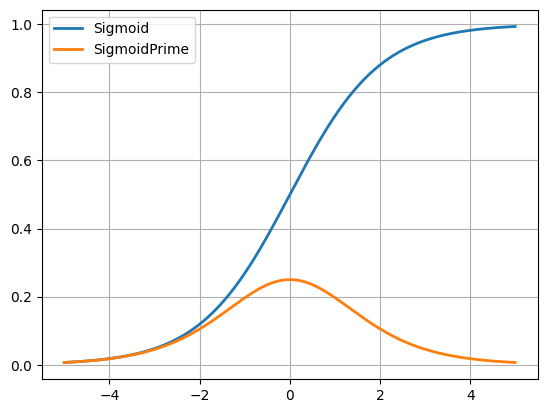

In [275]:
testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN.sigmoid(testValues),linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['Sigmoid','SigmoidPrime'])



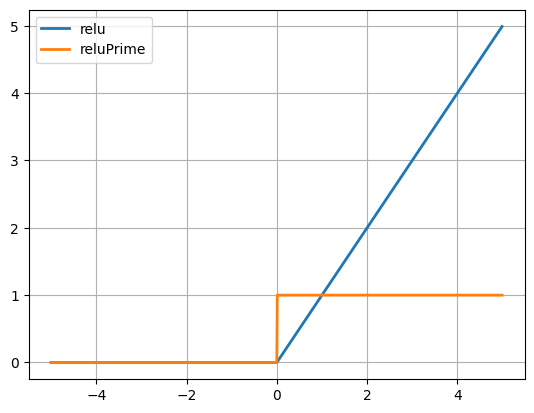

In [276]:
testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN.relu(testValues),linewidth=2)
plt.plot(testValues, NN.reluPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['relu','reluPrime'])

In [277]:
NN=Neural_Network()

In [278]:
cost1=NN.costFunction(X,y)

In [279]:
cost1

array([0.04435795])

In [280]:
dJdW1,dJdW2=NN.costFunctionPrime(X,y)

In [281]:
dJdW1

array([[-0.00589663, -0.01272123, -0.0013097 ],
       [-0.00254048, -0.00539534, -0.00057248]])

In [282]:
dJdW2

array([[-0.06849284],
       [-0.06249189],
       [-0.05919741]])

In [283]:
scalar=1
NN.W1 = NN.W1+scalar*dJdW1
NN.W2 = NN.W2+scalar*dJdW2
cost2 = NN.costFunction(X,y)
print (cost1,cost2)

[0.04435795] [0.05800089]


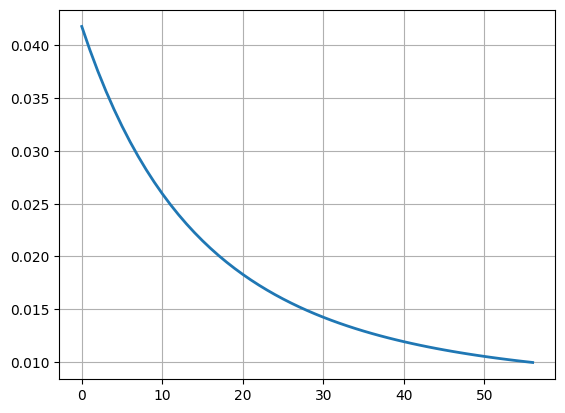

In [284]:
#Normal NN
dJdW1,dJdW2=NN.costFunctionPrime(X,y)
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost = NN.costFunction(X,y)
scalar=0.2
threshold = 1e-2
costs = [cost]
iterations = [0]
i = 1
while cost > threshold:
    dJdW1,dJdW2=NN.costFunctionPrime(X,y)
    NN.W1 = NN.W1-scalar*dJdW1
    NN.W2 = NN.W2-scalar*dJdW2
    cost = NN.costFunction(X,y)
    iterations.append(i)
    i += 1
    costs.append(cost)

plt.plot(iterations, costs, linewidth=2)
plt.grid(1)

'\n    When the learning rate is unusually large, the graph behaves in a strange way. It fluctuates as the iteration goes on.\n'

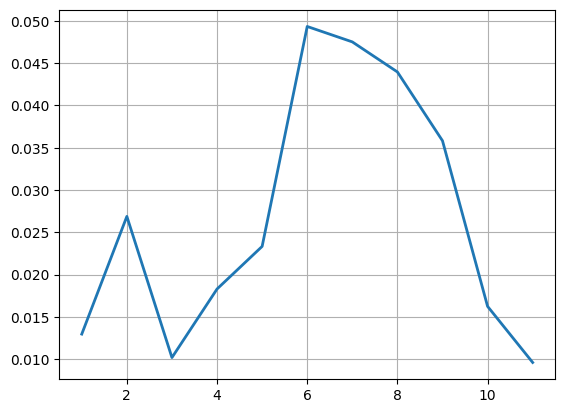

In [285]:
#Unusually large learning rate
NN_2=Neural_Network()
scalar=50
costs = []
iterations = []
cost = NN_2.costFunction(X, y)
i = 1
while cost > threshold:
    dJdW1,dJdW2=NN_2.costFunctionPrime(X,y)
    NN_2.W1 = NN_2.W1-scalar*dJdW1
    NN_2.W2 = NN_2.W2-scalar*dJdW2
    cost = NN_2.costFunction(X,y)
    iterations.append(i)
    i += 1
    costs.append(cost)

plt.plot(iterations, costs, linewidth=2)
plt.grid(1)

"""
    When the learning rate is unusually large, the graph behaves in a strange way. It fluctuates as the iteration goes on.
"""

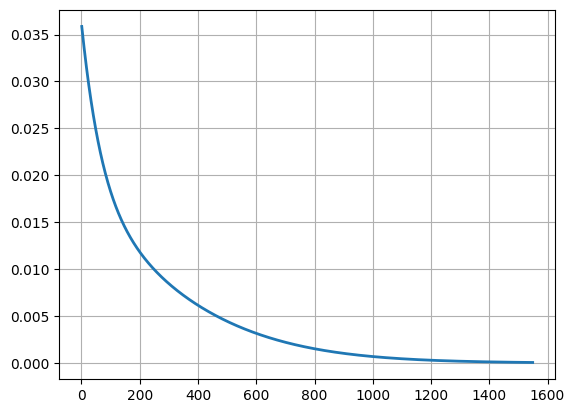

In [286]:
# Normal NN With Relu
NN_Relu=Neural_Network()
threshold = 1e-4
scalar = 0.01
costs = []
iterations = []
cost = NN_Relu.costFunction_ReLu(X, y)
i = 1
while cost > threshold:
#for i in range(100):
    dJdW1,dJdW2=NN_Relu.costFunctionPrime_ReLu(X,y)
    NN_Relu.W1 = NN_Relu.W1-scalar*dJdW1
    NN_Relu.W2 = NN_Relu.W2-scalar*dJdW2
    cost = NN_Relu.costFunction_ReLu(X,y)
    iterations.append(i)
    i += 1
    costs.append(cost)

plt.plot(iterations, costs, linewidth=2)
plt.grid(1)

'\n    Using the ReLu activation function, we can see the function goes really fast to its minimum with a small learning rate.\n'

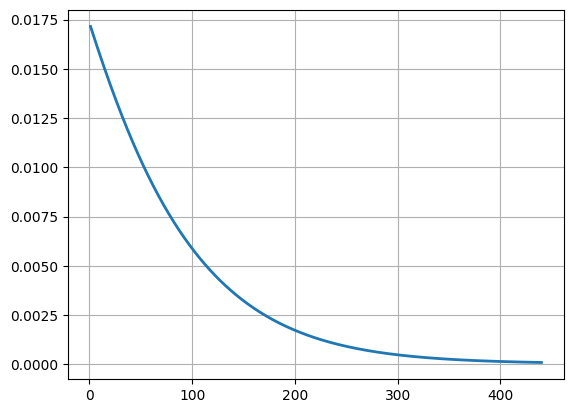

In [287]:
#ReLu with 2 hidden layers
NN_Relu_2_hidden_layers=Neural_Network_2_Hidden_Layers()
cost = NN_Relu_2_hidden_layers.costFunction_ReLu(X, y)
costs = []
iterations = []
i = 1
scalar = 0.01
while cost > threshold:
    dJdW1,dJdW2,dJdW3=NN_Relu_2_hidden_layers.costFunctionPrime_ReLu(X,y)
    NN_Relu_2_hidden_layers.W1 = NN_Relu_2_hidden_layers.W1-scalar*dJdW1
    NN_Relu_2_hidden_layers.W2 = NN_Relu_2_hidden_layers.W2-scalar*dJdW2
    NN_Relu_2_hidden_layers.W3 = NN_Relu_2_hidden_layers.W3-scalar*dJdW3
    cost = NN_Relu_2_hidden_layers.costFunction_ReLu(X,y)
    iterations.append(i)
    i += 1
    costs.append(cost)

plt.plot(iterations, costs, linewidth=2)
plt.grid(1)
"""
    Using the ReLu activation function, we can see the function goes really fast to its minimum with a small learning rate.
"""

'\n    Using the ReLu activation function, we can see the function goes really fast to its minimum with a small learning rate.\n'

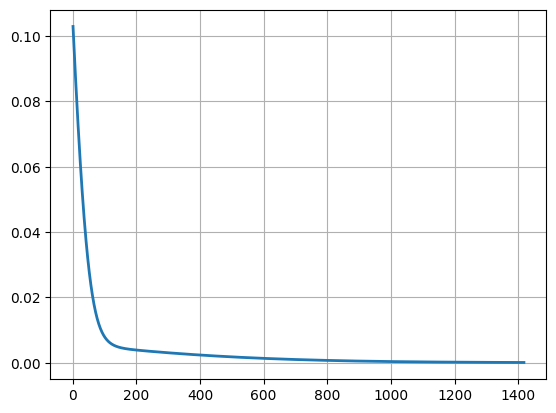

In [288]:
#ReLu with 2 hidden layers and 10 units each layer
NN_Relu_2_hidden_layers_10_unit = Neural_Network_2_Hidden_Layers()
NN_Relu_2_hidden_layers_10_unit.setHiddenLayerSize(10)
costs = []
iterations = []
i = 1
cost = NN_Relu_2_hidden_layers_10_unit.costFunction_ReLu(X,y)
scalar = 0.01
while cost > threshold:
    dJdW1,dJdW2,dJdW3=NN_Relu_2_hidden_layers_10_unit.costFunctionPrime_ReLu(X,y)
    NN_Relu_2_hidden_layers_10_unit.W1 = NN_Relu_2_hidden_layers_10_unit.W1-scalar*dJdW1
    NN_Relu_2_hidden_layers_10_unit.W2 = NN_Relu_2_hidden_layers_10_unit.W2-scalar*dJdW2
    NN_Relu_2_hidden_layers_10_unit.W3 = NN_Relu_2_hidden_layers_10_unit.W3-scalar*dJdW3
    cost = NN_Relu_2_hidden_layers_10_unit.costFunction_ReLu(X,y)
    iterations.append(i)
    i += 1
    costs.append(cost)

plt.plot(iterations, costs, linewidth=2)
plt.grid(1)
"""
    Using the ReLu activation function, we can see the function goes really fast to its minimum with a small learning rate.
"""